# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Reza Firmansyah Putranto
- **Email:** rezafp30@gmail.com
- **ID Dicoding:** reza_fp

## Menentukan Pertanyaan Bisnis

- Bagaimana Performa Penyewaan Produk untuk Casual User dan Registered User?
- Bagaimana Pemetaan Customer Segment pada Penyewaan Produk?

## Import Semua Packages/Library yang Digunakan

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [7]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [9]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

### Menilai tabel day_df

In [22]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [30]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [31]:
day_df.nunique()

,0
instant,731
dteday,731
season,4
yr,2
mnth,12
holiday,2
weekday,7
workingday,2
weathersit,3
temp,499


In [24]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Menilai tabel hour_df

In [25]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [32]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [26]:
hour_df.nunique()

,0
instant,17379
dteday,731
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4


In [27]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

### Membersihkan tabel day_df

In [28]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


### Memperbaiki tipe data

In [33]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [34]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [35]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Membersihkan tabel hour_df

In [36]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Memperbaiki Tipe Data

In [37]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [38]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [39]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore day_df

In [50]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
385,386,2012-01-21,1,1,1,0,6,0,2,0.173333,0.174875,0.831250,0.222642,67,1234,1301
366,367,2012-01-02,1,1,1,1,1,0,1,0.273043,0.252304,0.381304,0.329665,244,1707,1951
207,208,2011-07-27,3,0,7,0,3,1,1,0.775000,0.690667,0.402917,0.183463,755,3901,4656
395,396,2012-01-31,1,1,1,0,2,1,1,0.390000,0.381317,0.416667,0.261817,324,4185,4509
138,139,2011-05-19,2,0,5,0,4,1,2,0.530833,0.510742,0.829583,0.108213,735,3840,4575


In [53]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


<Axes: >

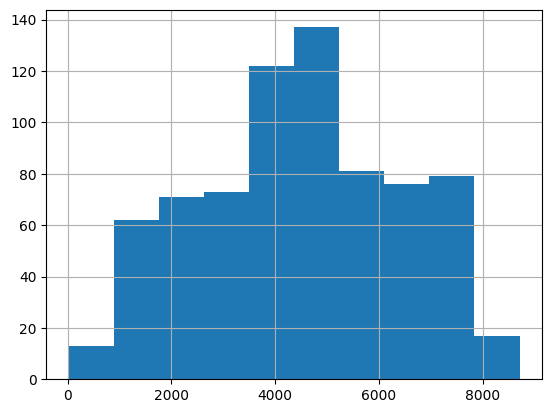

In [55]:
day_df.cnt.hist()

### Explore hour_df

In [49]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,status
11869,11870,2012-05-14,2,1,5,18,0,1,1,2,0.58,0.5455,0.83,0.0000,17,283,300,Inactive
3815,3816,2011-06-12,2,0,6,21,0,0,0,1,0.66,0.6061,0.83,0.1045,39,101,140,Inactive
11093,11094,2012-04-12,2,1,4,10,0,4,1,1,0.40,0.4091,0.50,0.2985,38,103,141,Inactive
12072,12073,2012-05-23,2,1,5,5,0,3,1,3,0.56,0.5303,0.88,0.2537,6,29,35,Inactive
14490,14491,2012-08-31,3,1,8,23,0,5,1,1,0.74,0.6818,0.62,0.1045,32,142,174,Inactive


In [51]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,status
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inactive
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16649
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,NaN
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,NaN
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,NaN
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,NaN
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,NaN


<Axes: >

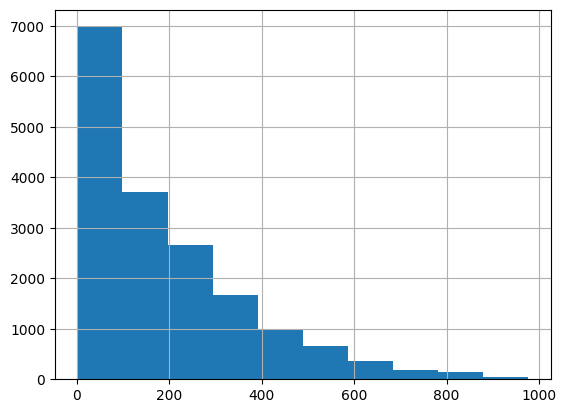

In [54]:
hour_df.cnt.hist()

In [56]:
instant_in_day_df = day_df.instant
hour_df["status"] = hour_df["instant"].apply(lambda x: "Active" if x in instant_in_day_df else "Inactive")
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,status
2741,2742,2011-04-29,2,0,4,3,0,5,1,1,0.46,0.4545,0.59,0.0896,1,4,5,Inactive
16008,16009,2012-11-04,4,1,11,17,0,0,0,1,0.36,0.3485,0.43,0.1940,57,270,327,Inactive
14116,14117,2012-08-16,3,1,8,9,0,4,1,1,0.72,0.6667,0.54,0.1045,41,296,337,Inactive
13857,13858,2012-08-05,3,1,8,14,0,0,0,1,0.90,0.8485,0.42,0.4627,161,365,526,Inactive
7843,7844,2011-11-28,4,0,11,11,0,1,1,2,0.52,0.5000,0.68,0.1045,11,107,118,Inactive


In [57]:
hour_df.groupby(by="status").instant.count()

,instant
status,
Active,730
Inactive,16649


In [58]:
hour_df[hour_df.status == "Active"]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,status
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,Active
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,Active
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,Active
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,Active
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,2011-02-02,1,0,2,14,0,3,1,1,0.38,0.3939,0.82,0.3881,2,61,63,Active
726,727,2011-02-02,1,0,2,15,0,3,1,1,0.38,0.3939,0.76,0.3284,10,66,76,Active
727,728,2011-02-02,1,0,2,16,0,3,1,1,0.36,0.3333,0.71,0.2985,8,95,103,Active
728,729,2011-02-02,1,0,2,17,0,3,1,1,0.36,0.3182,0.53,0.5224,7,183,190,Active


### Menggabungkan data day_df dan hour_df

In [59]:
day_hour_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="left",
    left_on="instant",
    right_on="instant"
)
day_hour_df.head()

,instant,dteday_x,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y,status
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0,1,0.24,0.2879,0.81,0.0,3,13,16,Active
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,0,1,0.22,0.2727,0.80,0.0,8,32,40,Active
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,0,1,0.22,0.2727,0.80,0.0,5,27,32,Active
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,0,1,0.24,0.2879,0.75,0.0,3,10,13,Active
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,0,1,0.24,0.2879,0.75,0.0,0,1,1,Active


In [64]:
day_hour_df.groupby(by="status").agg({
    "instant": "nunique",
    "casual_x": "sum",
    "registered_x": "sum",
    "cnt_x": "sum"
})

,instant,casual_x,registered_x,cnt_x
status,,,,
Active,730,619578,2670372,3289950
Inactive,1,439,2290,2729


In [61]:
day_hour_df.groupby(by="holiday_x").instant.nunique().sort_values(ascending=False)

,instant
holiday_x,
0,710
1,21


In [62]:
day_hour_df.groupby(by="weekday_x").instant.nunique().sort_values(ascending=False)

,instant
weekday_x,
0,105
1,105
6,105
2,104
3,104
4,104
5,104


In [63]:
day_hour_df.groupby(by="workingday_x").instant.nunique().sort_values(ascending=False)

,instant
workingday_x,
1,500
0,231


## Visualization & Explanatory Analysis

### Pertanyaan 1: Seberapa baik dan buruk penyewaan produk oleh casual user pada Weekday?

In [70]:
sum_rent_df = day_hour_df.groupby("weekday_x").casual_x.sum().sort_values(ascending=False).reset_index()
sum_rent_df.head(10)

,weekday_x,casual_x
0,6,153852
1,0,140521
2,5,78238
3,1,70784
4,4,61460
5,2,57843
6,3,57319


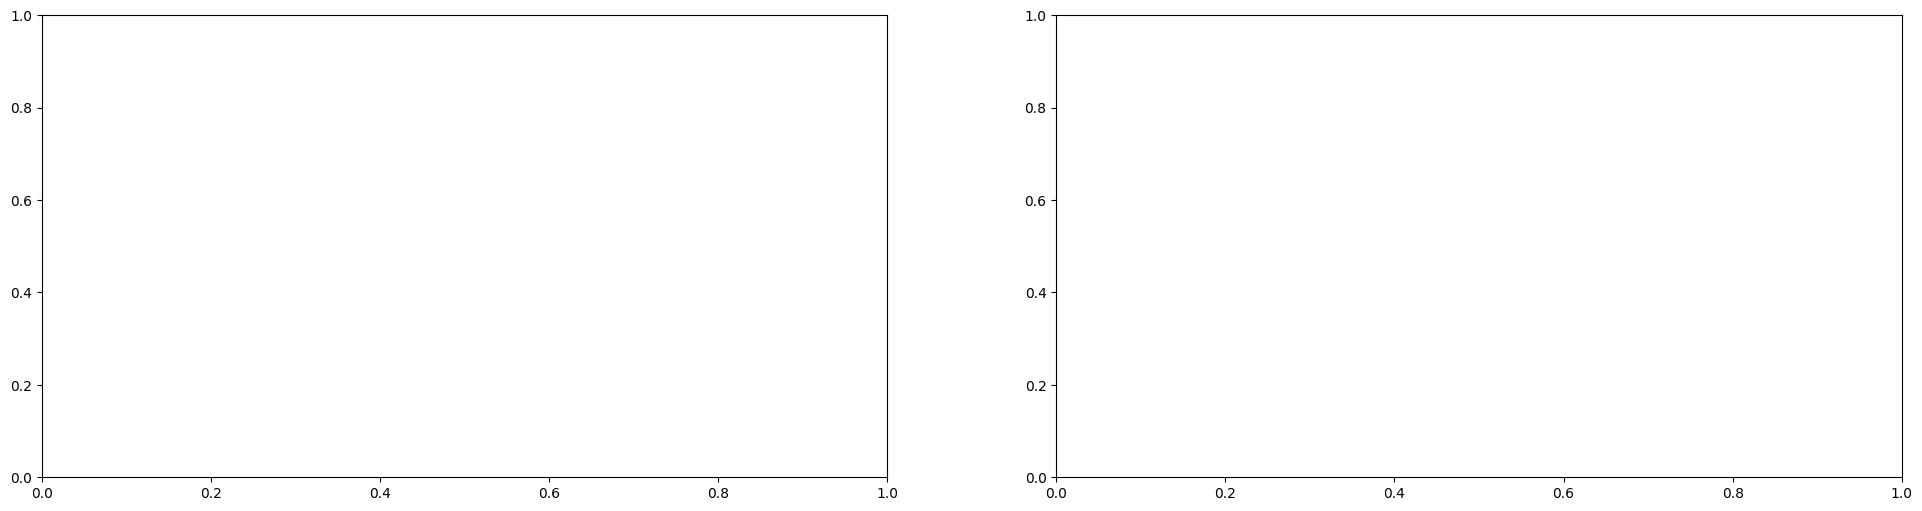

In [71]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

<ipython-input-73-e93fea749933>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="casual_x", y="weekday_x", data=sum_rent_df.head(5), palette=colors, ax=ax[0])
<ipython-input-73-e93fea749933>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="casual_x", y="weekday_x", data=sum_rent_df.sort_values(by="casual_x", ascending=True).head(5), palette=colors, ax=ax[1])


Text(0.5, 0.98, 'Best and Worst Renting Product by Casual Users in Weekday')

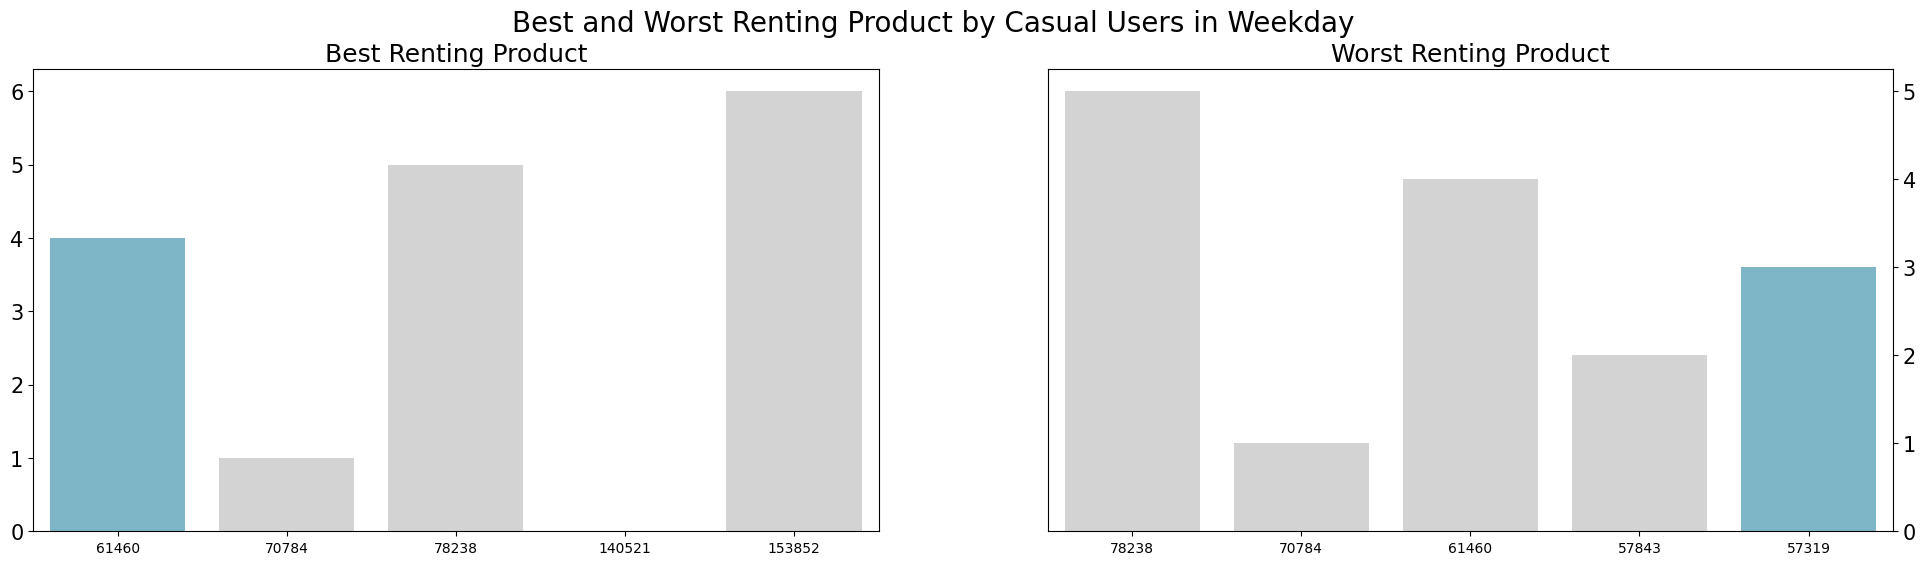

In [73]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="casual_x", y="weekday_x", data=sum_rent_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Renting Product", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="casual_x", y="weekday_x", data=sum_rent_df.sort_values(by="casual_x", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Renting Product", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Best and Worst Renting Product by Casual Users in Weekday", fontsize=20)

### Pertanyaan 2: Seberapa baik dan buruk penyewaan produk oleh registered user pada Weekday?

In [74]:
sum_rent_df = day_hour_df.groupby("weekday_x").registered_x.sum().sort_values(ascending=False).reset_index()
sum_rent_df.head(10)

,weekday_x,registered_x
0,4,423935
1,3,415729
2,2,411266
3,5,409552
4,1,384719
5,6,323955
6,0,303506


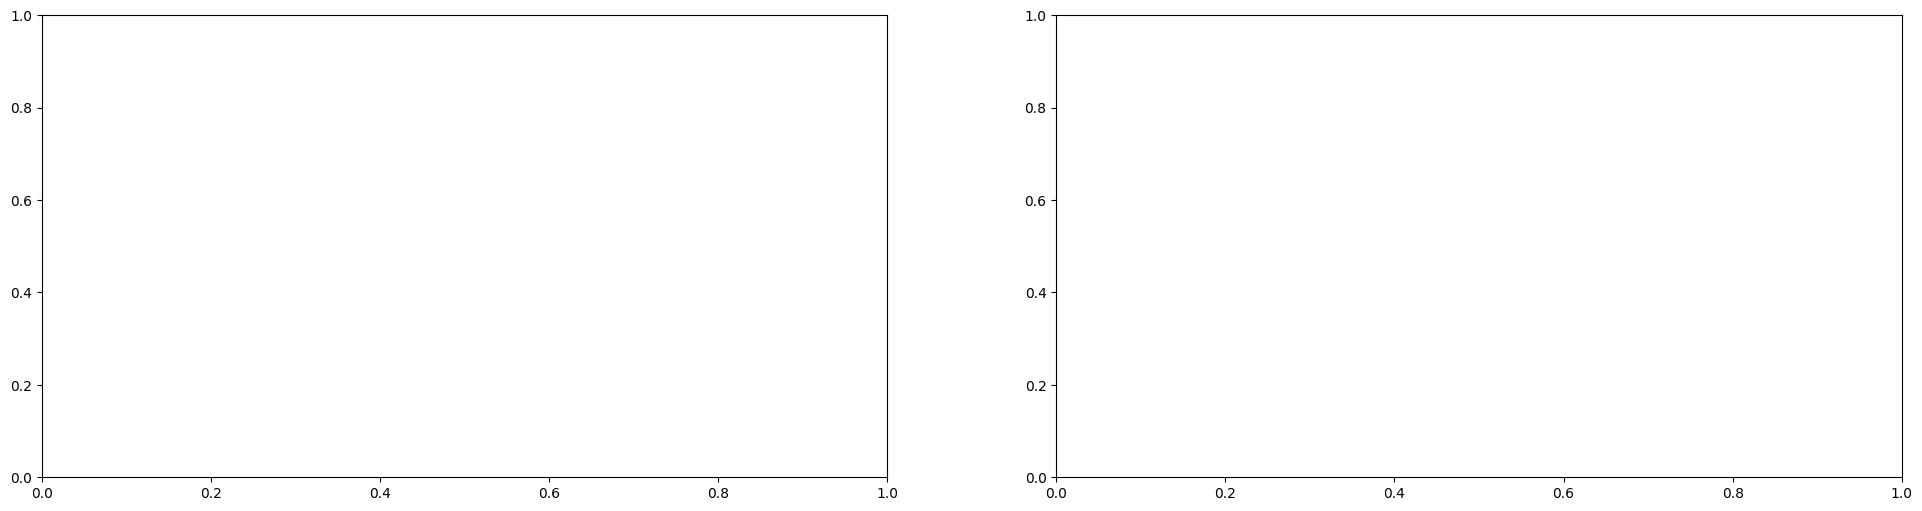

In [75]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

<ipython-input-77-94233ce571fd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="registered_x", y="weekday_x", data=sum_rent_df.head(5), palette=colors, ax=ax[0])
<ipython-input-77-94233ce571fd>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="registered_x", y="weekday_x", data=sum_rent_df.sort_values(by="registered_x", ascending=True).head(5), palette=colors, ax=ax[1])


Text(0.5, 0.98, 'Best and Worst Renting Product by Registered Users in Weekday')

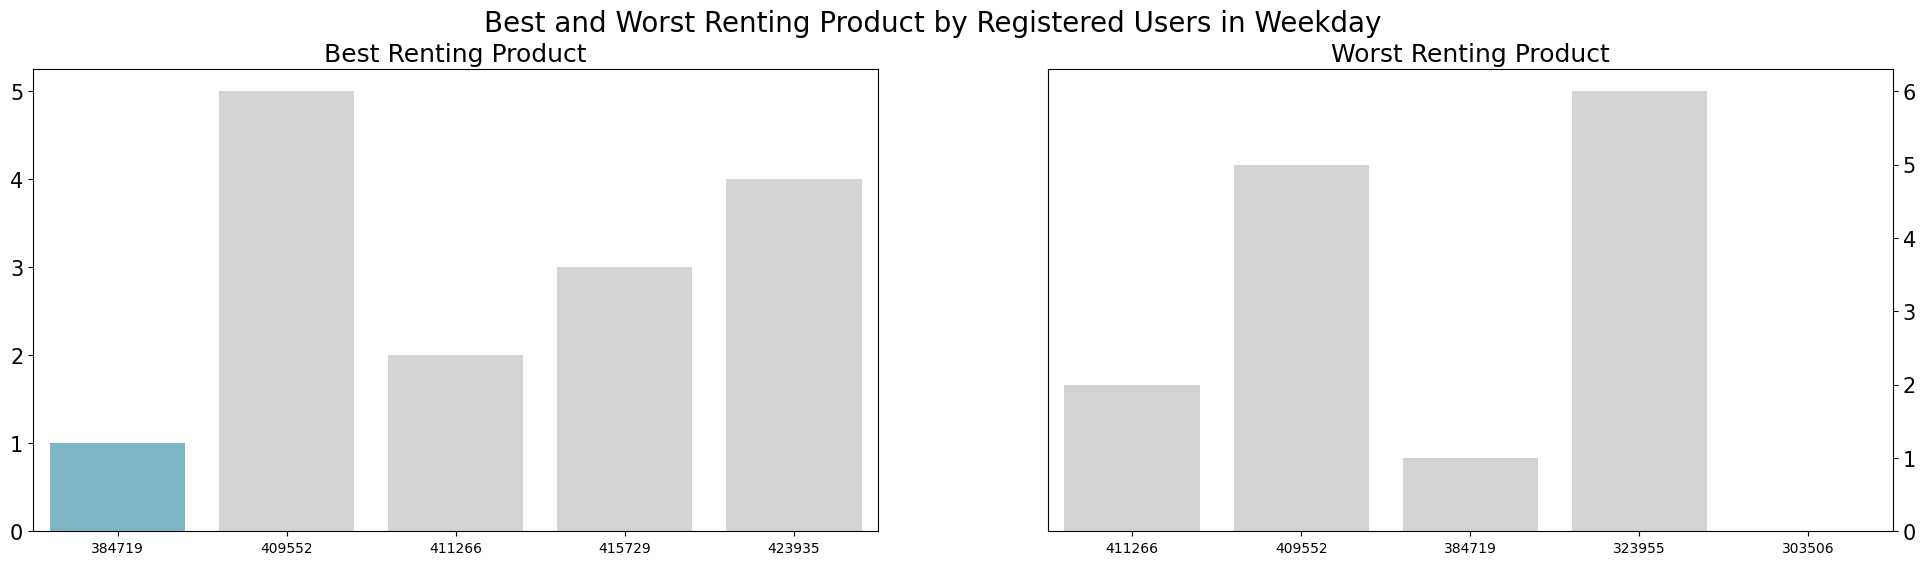

In [77]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="registered_x", y="weekday_x", data=sum_rent_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Renting Product", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="registered_x", y="weekday_x", data=sum_rent_df.sort_values(by="registered_x", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Renting Product", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Best and Worst Renting Product by Registered Users in Weekday", fontsize=20)

## RFM Analysis

In [117]:
rfm_df = day_hour_df.groupby(by="instant", as_index=False).agg({
    "dteday_x": "max", #mengambil tanggal order terakhir
    "instant": "nunique",
    "cnt_x": "sum"
})
rfm_df.columns = ["max_order_timestamp", "instant", "frequency"]
rfm_df.head()

,max_order_timestamp,instant,frequency
0,2011-01-01,1,985
1,2011-01-02,1,801
2,2011-01-03,1,1349
3,2011-01-04,1,1562
4,2011-01-05,1,1600


In [118]:
# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = day_df["dteday"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
rfm_df.head()

,max_order_timestamp,instant,frequency,recency
0,2011-01-01,1,985,730
1,2011-01-02,1,801,729
2,2011-01-03,1,1349,728
3,2011-01-04,1,1562,727
4,2011-01-05,1,1600,726


In [119]:
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,instant,frequency,recency
0,1,985,730
1,1,801,729
2,1,1349,728
3,1,1562,727
4,1,1600,726


In [120]:
rfm_df.describe()

,instant,frequency,recency
count,731.0,731.000000,731.000000
mean,1.0,4504.348837,365.000000
std,0.0,1937.211452,211.165812
min,1.0,22.000000,0.000000
25%,1.0,3152.000000,182.500000
50%,1.0,4548.000000,365.000000
75%,1.0,5956.000000,547.500000
max,1.0,8714.000000,730.000000


In [87]:
rfm_df.sort_values(by="recency", ascending=True).head(5)

,instant,frequency,recency
730,1,2729,0
729,1,1796,1
728,1,1341,2
727,1,3095,3
726,1,2114,4


In [121]:
rfm_df.sort_values(by="frequency", ascending=False).head(5)

,instant,frequency,recency
623,1,8714,107
637,1,8555,93
630,1,8395,100
447,1,8362,283
504,1,8294,226


<ipython-input-122-505944e5873f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="instant", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
<ipython-input-122-505944e5873f>:5: UserWarning: The palette list has more values (5) than needed (1), which may not be intended.
  sns.barplot(y="recency", x="instant", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
<ipython-input-122-505944e5873f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="instant", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
<ipython-input-122-505944e5873f>:11: Us

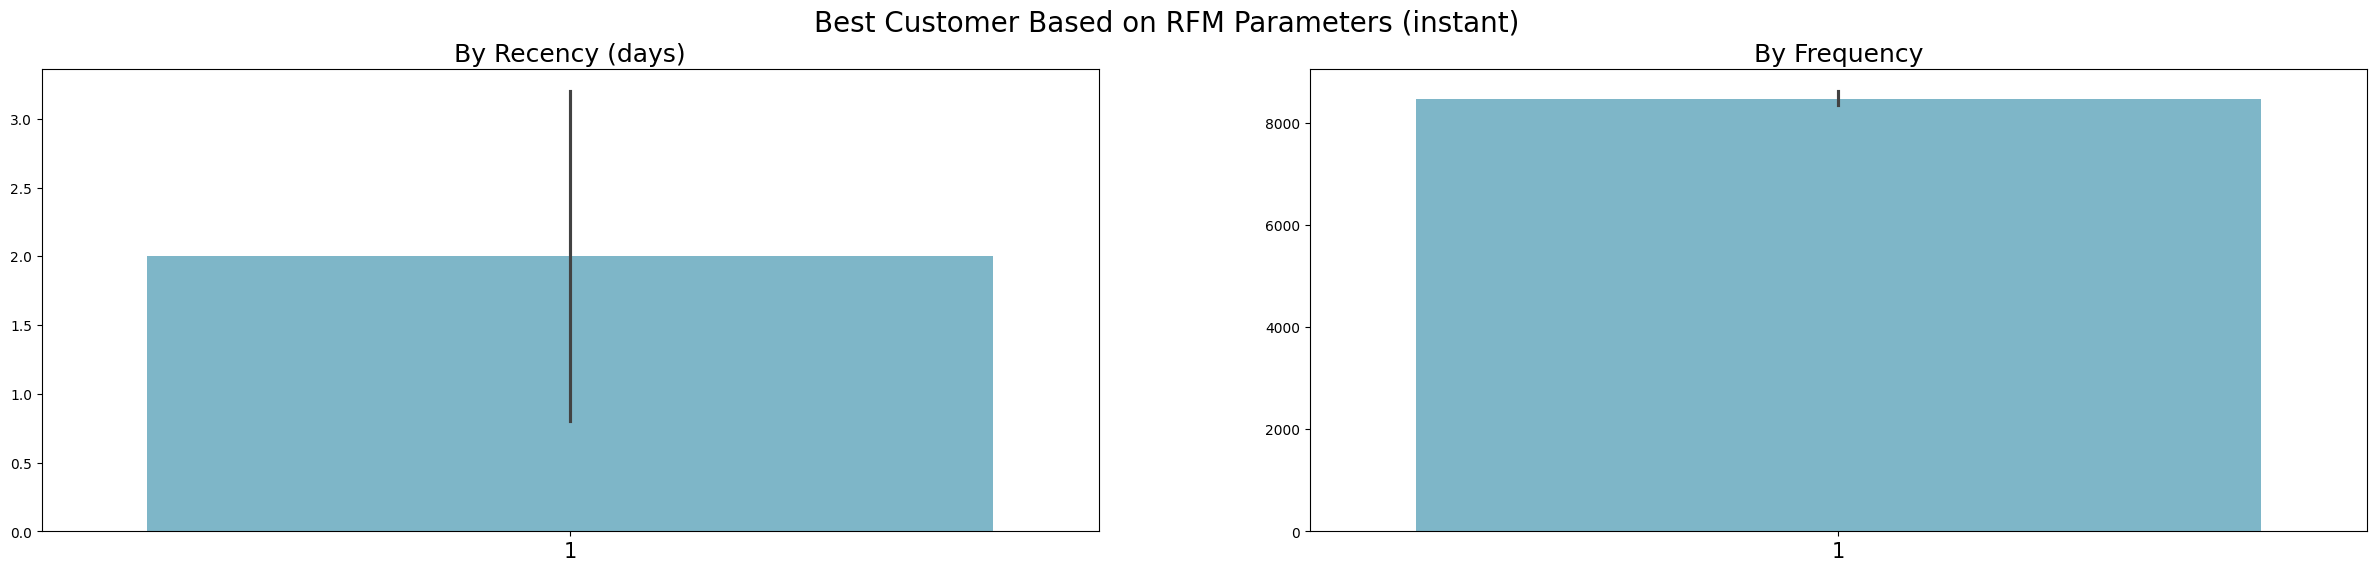

In [122]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="instant", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="instant", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (instant)", fontsize=20)
plt.show()

### Mengurutkan customer berdasarkan recency & frequency score

In [123]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)

rfm_df.head()


,instant,frequency,recency,r_rank,f_rank
0,1,985,730,1.0,17.0
1,1,801,729,2.0,12.0
2,1,1349,728,3.0,39.0
3,1,1562,727,4.0,59.0
4,1,1600,726,5.0,61.0


In [124]:
rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100

rfm_df.drop(columns=['r_rank', 'f_rank'], inplace=True)

rfm_df.head()

,instant,frequency,recency,r_rank_norm,f_rank_norm
0,1,985,730,0.136799,2.325581
1,1,801,729,0.273598,1.641587
2,1,1349,728,0.410397,5.335157
3,1,1562,727,0.547196,8.071135
4,1,1600,726,0.683995,8.344733


In [126]:
rfm_df['RFM_score'] = rfm_df['r_rank_norm']+ \
    rfm_df['f_rank_norm']
rfm_df[['instant', 'RFM_score']].head(7)

,instant,RFM_score
0,1,2.47
1,1,1.91
2,1,5.75
3,1,8.62
4,1,9.02
5,1,9.44
6,1,7.94


### Segmentasi customer berdasarkan RFM_score

In [127]:
rfm_df["customer_segment"] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top customers", (np.where(
        rfm_df['RFM_score'] > 4, "High value customer",(np.where(
            rfm_df['RFM_score'] > 3, "Medium value customer", np.where(
                rfm_df['RFM_score'] > 1.6, 'Low value customers', 'lost customers'))))))

rfm_df[['instant', 'RFM_score', 'customer_segment']].head(20)

,instant,RFM_score,customer_segment
0,1,2.47,Low value customers
1,1,1.91,Low value customers
2,1,5.75,Top customers
3,1,8.62,Top customers
4,1,9.02,Top customers
5,1,9.44,Top customers
6,1,7.94,Top customers
7,1,3.14,Medium value customer
8,1,3.01,Medium value customer
9,1,6.43,Top customers


In [128]:
customer_segment_df = rfm_df.groupby(by="customer_segment", as_index=False).instant.nunique()
customer_segment_df

,customer_segment,instant
0,High value customer,1
1,Low value customers,1
2,Medium value customer,1
3,Top customers,1


In [129]:
customer_segment_df['customer_segment'] = pd.Categorical(customer_segment_df['customer_segment'], [
    "lost customers", "Low value customers", "Medium value customer",
    "High value customer", "Top customers"
])

<ipython-input-130-6f7c7b2b780e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


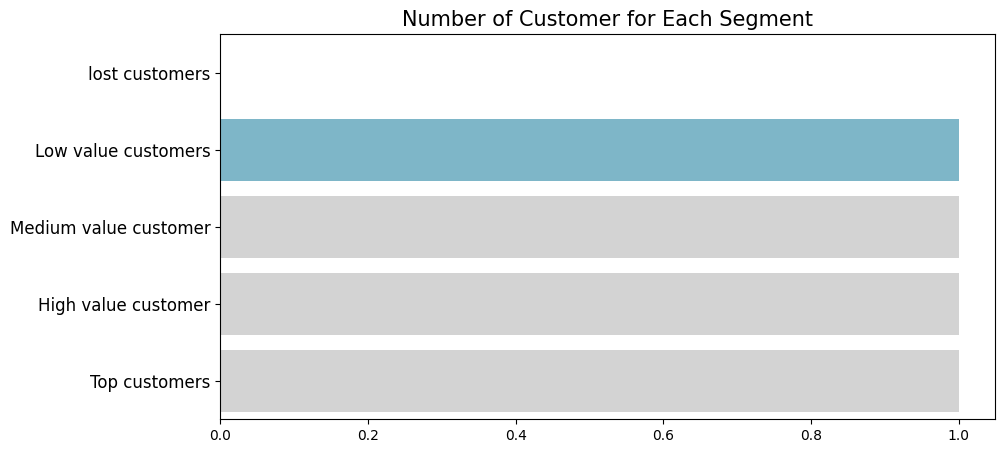

In [130]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="instant",
    y="customer_segment",
    data=customer_segment_df.sort_values(by="customer_segment", ascending=False),
    palette=colors_
)
plt.title("Number of Customer for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

## Conclusion

- Berdasarkan analisis dan visualisasi diatas dapat dilihat bahwa perfoma terbaik dan terburuk penyewaan produk untuk casual serta registered user
- Dengan analisis RFM yaitu menggunakan RFM score dapat kita lihat dari hasil visualisasi diatas customer segment yang kita dapatkan berupa lost customers, Low value customers, Medium value customer, High value customer, dan Top customers